In [38]:
import pandas as pd
import sweetviz as sv

df = pd.read_csv("../data/raw/mtcars.csv")
df.head()

c:\Users\Aissa\anaconda3\envs\ITESO\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
df = df.set_index("model")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
#promedio eje 0 = Columnas
df.mean(axis = 0)

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [12]:
#promedio eje 1 = Filas
df.mean(axis = 1)

model
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Mase

## IQR 

$$
Q_3 - Q_1
$$

$$
lower = Q_1 - 1.5 *IQR
$$
$$
upper = Q_3 + 1.5 *IQR
$$


In [14]:
IQR = df.mpg.quantile(0.75) - df.mpg.quantile(0.75)
print(IQR) 

0.0


In [15]:
lower = df.mpg.quantile(0.25) - 1.5 * IQR
upper = df.mpg.quantile(0.75) - 1.5 * IQR
print(f"lower: {lower} upper: {upper}")

lower: 15.425 upper: 22.8


In [26]:
#Outliers, Datos fuera del lower and upper limits
outliers = df["mpg"]
for i in outliers:
    if i > upper or i < lower:
        print(i,outliers)

35.3 model
Mazda RX4              35.3
Mazda RX4 Wag          35.3
Datsun 710             37.1
Hornet 4 Drive         35.7
Hornet Sportabout      33.0
Valiant                32.4
Duster 360             28.6
Merc 240D              38.7
Merc 230               37.1
Merc 280               33.5
Merc 280C              32.1
Merc 450SE             30.7
Merc 450SL             31.6
Merc 450SLC            29.5
Cadillac Fleetwood     24.7
Lincoln Continental    24.7
Chrysler Imperial      29.0
Fiat 128               46.7
Honda Civic            44.7
Toyota Corolla         48.2
Toyota Corona          35.8
Dodge Challenger       29.8
AMC Javelin            29.5
Camaro Z28             27.6
Pontiac Firebird       33.5
Fiat X1-9              41.6
Porsche 914-2          40.3
Lotus Europa           44.7
Ford Pantera L         30.1
Ferrari Dino           34.0
Maserati Bora          29.3
Volvo 142E             35.7
Name: mpg, dtype: float64
35.3 model
Mazda RX4              35.3
Mazda RX4 Wag          35.3


<Axes: >

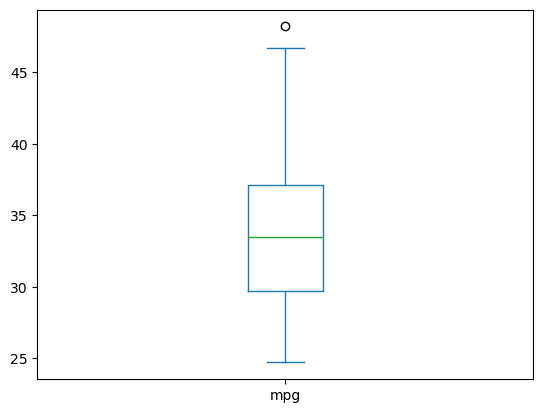

In [33]:
df.mpg.plot(kind = "box")

<Axes: ylabel='Frequency'>

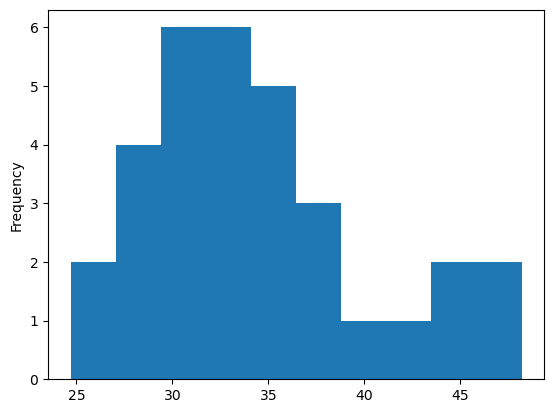

In [32]:
df.mpg.plot(kind = "hist")

In [35]:
df.skew()

mpg     0.672377
cyl    -0.192261
disp    0.420233
hp      0.799407
drat    0.292780
wt      0.465916
qsec    0.406347
vs      0.264542
am      0.400809
gear    0.582309
carb    1.157091
dtype: float64

<Axes: ylabel='Frequency'>

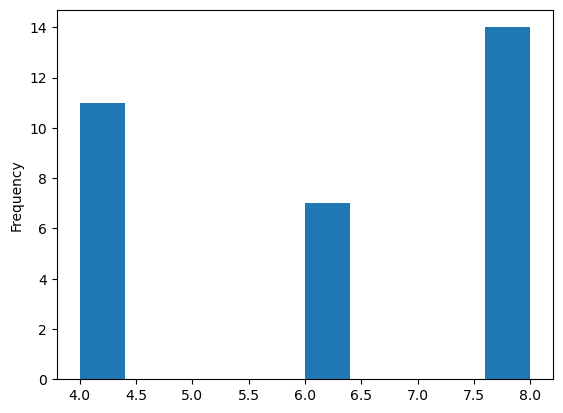

In [36]:
df.cyl.plot(kind = "hist")

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 607.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB 1.7 MB/s eta 0:00:10
   ---------------------------------------- 0.1/15.1 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.2/15.1 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.2/15.1 MB 1.3 MB/s eta 0:00:12
    --------------------------------------- 0.3/15.1 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.4/15.1 MB 1.3 MB/s eta 0:00:12
   - -------------------------------------- 0.4/15.1 MB 1.3 MB/s eta 0:00:12
   - -------------------------------------- 0.5/15.1 MB 1.4 MB/s eta 0:00:11
   - -------------------------------------- 0.6/15.1 MB 1.4 MB/s eta 0:00:11
   - -------

In [39]:
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
